# Analysis for RNA-DNA p-brain tissue sample

2021-04-23 smRNA and 04-26 CTP-09 MOP marker gene DNA-MERFISH

by Pu Zheng

2020.04.30


cortex: 2-7
thalamus 83-88
hippo: 63,64,66,67,68,70

# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

37072


In [2]:
import cellpose

2021-07-12 16:53:25,041 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


# 1. Create field-of-view class

In [3]:
reload(get_img_info)

<module 'ImageAnalysis3.get_img_info' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\get_img_info.py'>

In [4]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09',
             'save_folder':r'J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 20,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'I:\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             'ref_id': 3, # special for this experiment
             }

In [5]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=2,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_02.hdf5
try loading: gene_chrom_dict
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'gene_ref_im'] in 6.658s.
+ loading correction from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_

## 2. Process image into candidate spots

In [6]:

# process image into spots
fov._process_image_to_spots('combo', 
                         #_sel_ids=np.arange(1,21),
                         _load_common_reference=True,
                         _load_with_multiple=False,
                         _save_images=True,
                         _warp_images=False, 
                         _overwrite_drift=False,
                         _overwrite_image=False,
                         _overwrite_spot=True,
                         _verbose=True)

-- No folder selected, allow processing all 36 folders
-- checking combo, region:[1 2] in 0.007s.
-- checking combo, region:[3 4] in 0.005s.
-- checking combo, region:[41 42] in 0.005s.
-- checking combo, region:[43 44] in 0.005s.
-- checking combo, region:[45 46] in 0.005s.
-- checking combo, region:[47 48] in 0.005s.
-- checking combo, region:[49 50] in 0.005s.
-- checking combo, region:[51 52] in 0.004s.
-- checking combo, region:[53 54] in 0.005s.
-- checking combo, region:[55 56] in 0.005s.
-- checking combo, region:[57 58] in 0.004s.
-- checking combo, region:[59 60] in 0.005s.
-- checking combo, region:[21 22] in 0.004s.
-- checking combo, region:[23 24] in 0.004s.
-- checking combo, region:[25 26] in 0.004s.
-- checking combo, region:[27 28] in 0.004s.
-- checking combo, region:[29 30] in 0.005s.
-- checking combo, region:[31 32] in 0.005s.
-- checking combo, region:[33 34] in 0.004s.
-- checking combo, region:[35 36] in 0.004s.
-- checking combo, region:[37 38] in 0.004s.
-- c

TypeError: cannot unpack non-iterable NoneType object

In [39]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

fov.gene_ref_id = 3
# process image into spots
id_list, spot_list = fov._process_image_to_spots('gene', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=True, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=True,
                                                 _overwrite_spot=True,
                                                 _verbose=True)

-- No folder selected, allow processing all 36 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H7C1\Conv_zscan_00.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H7C1\Conv_zscan_00.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H7C1\Conv_zscan_00.dax  in 4.793s
-- removing hot pixels for channels:['488'] in 25.574s
-- illumination correction for channels: 488, in 5.757s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 37.475s
-- saving fov_info to file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
++ base attributes saved:['gene_ref_im'] in 12.153s.
-- checking gene, region:[2] in 0.003s.
-- checking gene, region:[5 1] in 0.003s.
-- checking gene, region:[3 4] i

In [40]:
dapi_im = fov._load_dapi_image(_dapi_id=1)

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H39GS177S326.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H39GS177S326\Conv_zscan_00.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H39GS177S326\Conv_zscan_00.dax  in 4.325s
-- removing hot pixels for channels:['405', '488'] in 40.450s
-- illumination correction for channels: 405, 488, in 7.886s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
--- align image 0 in 9.671s.
--- align image 1 in 9.559s.
--- align image 2 in 9.515s.
--- align image 3 in 9.573s.
--- align image 4 in 9.542s.
--- align image 5 in 9.700s.
--- align image 6 in 9.591s.
--- align image 7 in 9.646s.
-- 

<IPython.core.display.Javascript object>


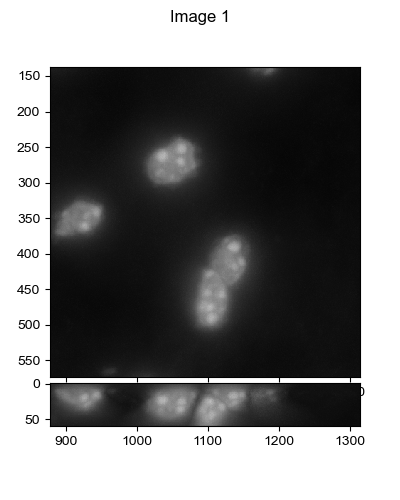

In [41]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im])

# Start from here

In [6]:
fov._load_from_file('combo')
fov._load_from_file('gene')

+ loading combo from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
++ finish loading combo in 0.027s. 
+ loading gene from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
++ finish loading gene in 0.003s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [7]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    gene_ims = _grp['ims'][:]
    gene_ids = _grp['ids'][:]
        #gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


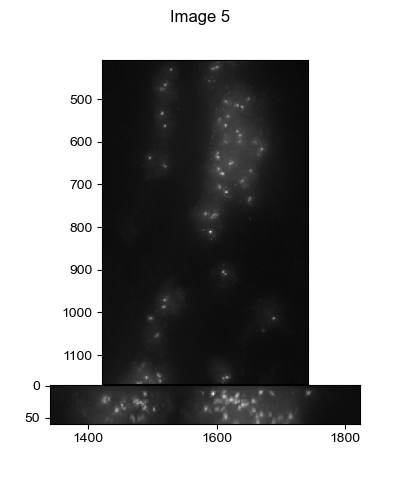

In [8]:
%matplotlib notebook
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(gene_ims[:])

In [42]:
kept_gene_spots_list = []
kept_inds_list = []

_verbose=True
crop_size = 11
dapi_crop_size = 5
snr_th = 1.5
dapi_snr_th = 2

for _spots in gene_spots_list:
    _kept_spots = []
    _kept_inds = []
    for _i, _spot in enumerate(_spots):
        #print(_spot[1:4])
        if (_spot[1:4] <= np.zeros(3)).any() or (_spot[1:4] >= np.array(fov.shared_parameters['single_im_size'])).any():
            continue
        local_gene_crop = io_tools.crop.crop_neighboring_area(
            gene_ims[gene_id], _spot[1:4], crop_size,
        )
        local_dapi_crop = io_tools.crop.crop_neighboring_area(
            fov.dapi_im, _spot[1:4], dapi_crop_size,
        )
        if np.max(local_gene_crop) > gene_bg * snr_th and np.max(local_dapi_crop) > dapi_bg * dapi_snr_th:
            _kept_spots.append(_spot)
            _kept_inds.append(_i)
    # append
    kept_gene_spots_list.append(np.array(_kept_spots))
    kept_inds_list.append(np.array(_kept_inds, dtype=np.int32))

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [173]:
reload(ia.segmentation_tools.chromosome)

gene_chrom_dict = {}
for _gind, _gid in enumerate(fov.gene_ids):
    gene_chrom_dict[_gid] = ia.segmentation_tools.chromosome.identify_chromosomes(gene_ims[_gind], fov.dapi_im)

-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 320.549s.
-- 244 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 345.408s.
-- 215 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 240.088s.
-- 192 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=2

In [13]:
gene_id = 4

from scipy.ndimage.filters import maximum_filter,minimum_filter,gaussian_filter


_im = gene_ims[gene_id]
_max_im = np.array(gaussian_filter(_im, 0.75), dtype=np.float)
_min_im = np.array(gaussian_filter(_im, 7.5), dtype=np.float)
_seed_im = _max_im - _min_im

In [20]:
snr_th = 1.3
dapi_snr_th = 2


In [15]:
gene_bg = io_tools.load.find_image_background(gene_ims[gene_id])
# caculate background for dapi
dapi_bg = io_tools.load.find_image_background(fov.dapi_im)

In [21]:
(snr_th - 1) * gene_bg

1549.5000000000002

In [22]:
_binary_im = (_seed_im > (snr_th - 1) * gene_bg) * (fov.dapi_im > dapi_bg * dapi_snr_th)

In [23]:
visual_tools.imshow_mark_3d_v2([_binary_im, _seed_im, gene_ims[gene_id]])

<IPython.core.display.Javascript object>

In [115]:
from scipy import ndimage
from skimage import morphology
#from scipy.stats import scoreatpercentile
_verbose=True
_morphology_size=1
## 3. erosion and dialation
if _verbose:
    print(f"-- erosion and dialation with size={_morphology_size}.")
_binary_label = _binary_im.copy()
_binary_label = ndimage.binary_erosion(_binary_label, morphology.ball(_morphology_size))
_binary_label = ndimage.binary_dilation(_binary_label, morphology.ball(_morphology_size))
_binary_label = ndimage.binary_fill_holes(_binary_label, structure=morphology.ball(_morphology_size))

-- erosion and dialation with size=1.


In [116]:
## 4. find object
if _verbose:
    print(f"-- find close objects.")
_open_objects = morphology.opening(_binary_label, morphology.ball(0))
_close_objects = morphology.closing(_open_objects, morphology.ball(1))
_label, _num = ndimage.label(_close_objects)
_label[_label==0] = -1

-- find close objects.


In [117]:
## 5. segmentation
_random_walk_beta = 10
if _verbose:
    print(f"-- random walk segmentation, beta={_random_walk_beta}.")
from skimage.segmentation import random_walker
_seg_label = random_walker(gene_ims[gene_id], _label, beta=_random_walk_beta, mode='cg_mg')
_seg_label[_seg_label < 0] = 0

-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


In [118]:
_min_label_size = 25
## 6. keep objects
if _verbose:
    print(f"-- find objects larger than size={_min_label_size}")
_kept_label = morphology.remove_small_objects(_seg_label, _min_label_size).astype(np.uint16)
_label_ids = np.unique(_kept_label)
_label_ids = _label_ids[_label_ids > 0]

-- find objects larger than size=25


In [119]:
## 7. calculate chr centers    
import multiprocessing as mp
_num_threads = 24

_chrom_args = [(_kept_label==_id,) for _id in _label_ids]

with mp.Pool(_num_threads,) as _chrom_pool:
    if _verbose:
        print(f"- Start multiprocessing caluclate chromosome coordinates with {_num_threads} threads", end=' ')
        _multi_time = time.time()
    # Multi-proessing!
    _chrom_coords = _chrom_pool.starmap(segmentation_tools.chromosome._calculate_binary_center, _chrom_args, chunksize=1)
    # close multiprocessing
    _chrom_pool.close()
    _chrom_pool.join()
    _chrom_pool.terminate()
    if _verbose:
        print(f"in {time.time()-_multi_time:.3f}s.")

_chrom_coords = np.array(_chrom_coords)

- Start multiprocessing caluclate chromosome coordinates with 24 threads in 298.022s.


<IPython.core.display.Javascript object>


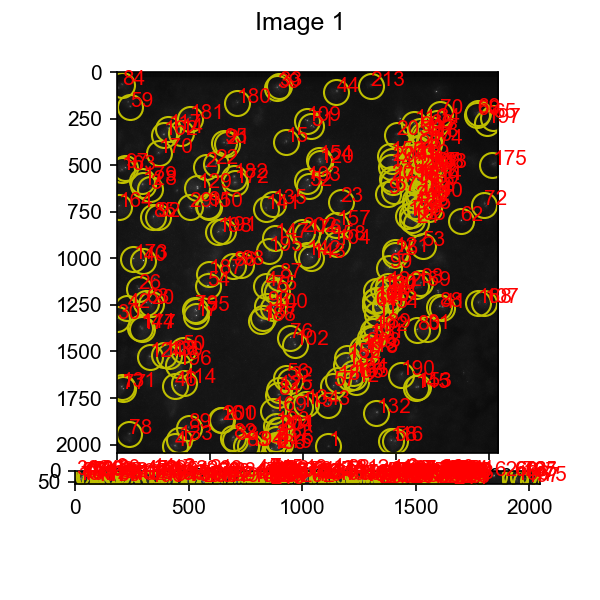

<IPython.core.display.Javascript object>

In [174]:
# visualize_all_chromosomes
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }

coord_dict['coords'] += list(np.flipud(_chrom_coord) for _chrom_coord in gene_chroms)
coord_dict['class_ids'] += list(np.zeros(len(gene_chroms),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2([gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [120]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }

coord_dict['coords'] += list(np.flipud(_chrom_coord) for _chrom_coord in _chrom_coords)
coord_dict['class_ids'] += list(np.zeros(len(_chrom_coords),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2([gene_ims[gene_id], _binary_im, _binary_label, _kept_label], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>

In [224]:
gid = 4

dna_reg_ids = fov.combo_ids
dna_reg_channels = fov.combo_channels
chrom_coords = gene_chrom_dict[gid]

intensity_th = 200

from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

print(f"input chromosomes: {len(chrom_coords)}")

kept_spots_list = []
for _spots in fov.combo_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)

reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]

# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

input chromosomes: 303
kept chromosomes: 272


+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.151s
--- collapse all regions into 1d.


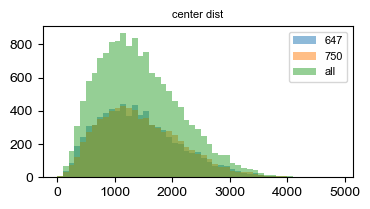

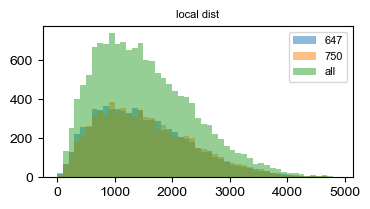

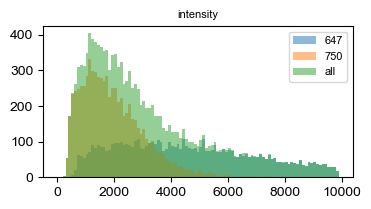

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.443s
-- region kept: 0.6718


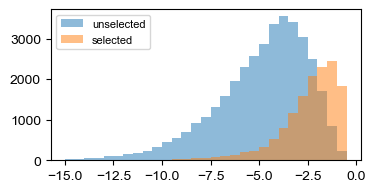

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.334s
--- collapse all regions into 1d.


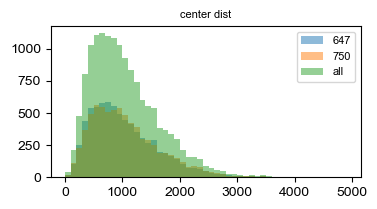

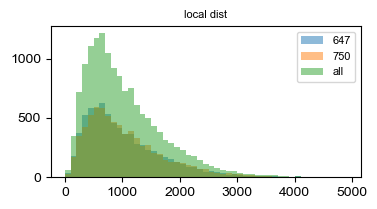

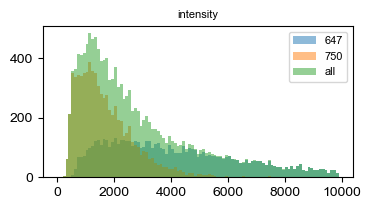

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.342s
-- region kept: 0.8891


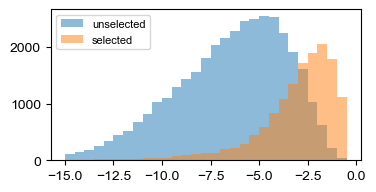

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.336s
--- collapse all regions into 1d.


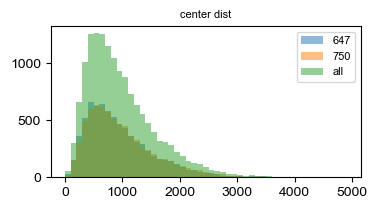

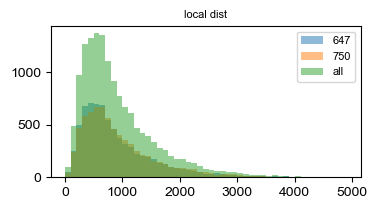

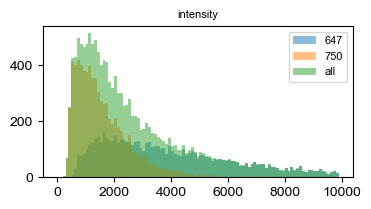

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.461s
-- region kept: 0.9602


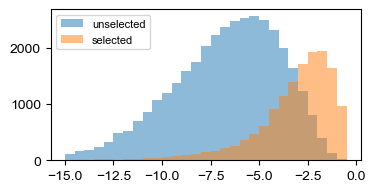

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.428s
--- collapse all regions into 1d.


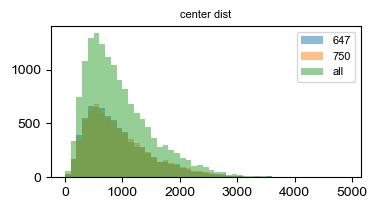

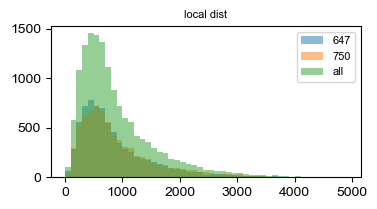

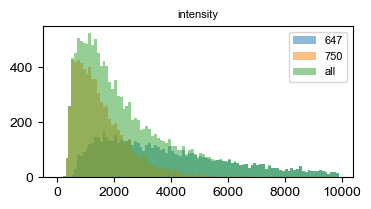

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.437s
-- region kept: 0.9826


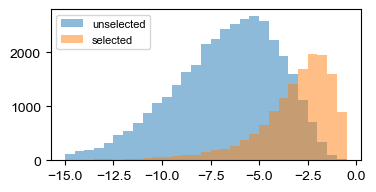

+ iter:4
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.417s
--- collapse all regions into 1d.


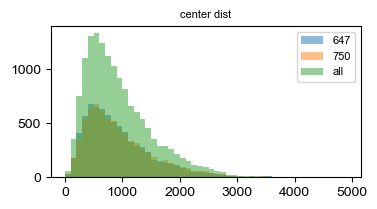

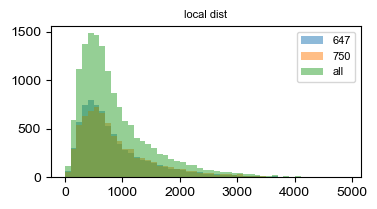

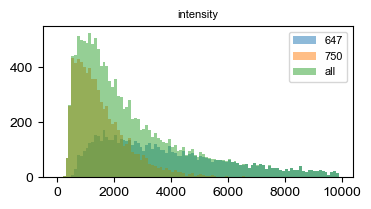

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.457s
-- region kept: 0.9922


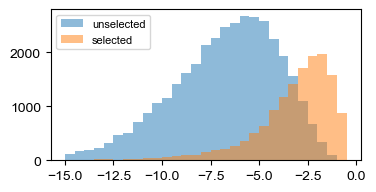

+ iter:5
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.536s
--- collapse all regions into 1d.


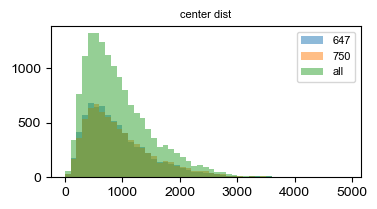

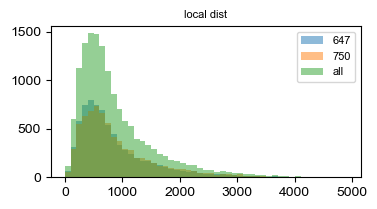

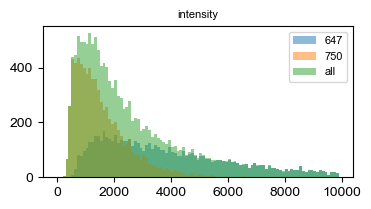

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.465s
-- region kept: 0.9954


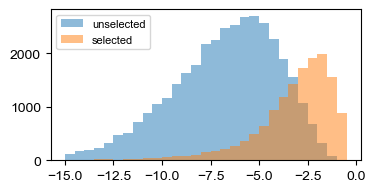

+ iter:6
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.551s
--- collapse all regions into 1d.


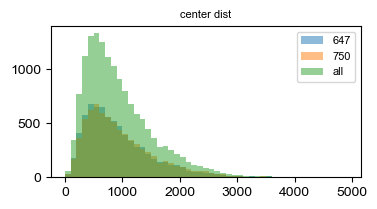

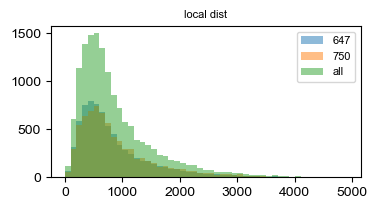

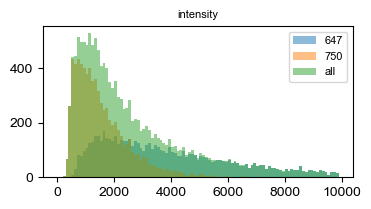

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.451s
-- region kept: 0.9973


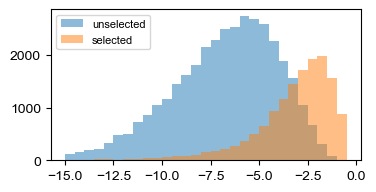

+ iter:7
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.453s
--- collapse all regions into 1d.


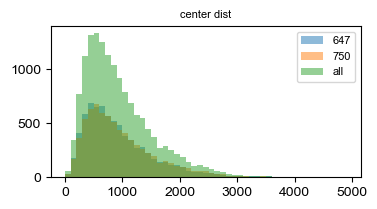

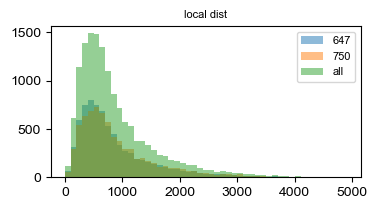

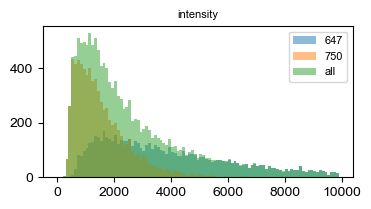

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.448s
-- region kept: 0.9977


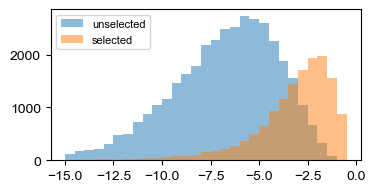

+ iter:8
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.410s
--- collapse all regions into 1d.


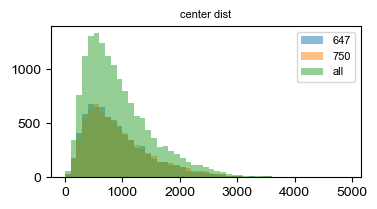

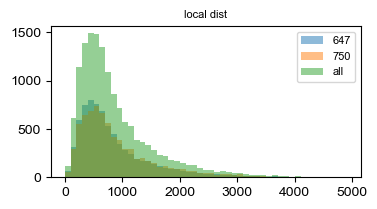

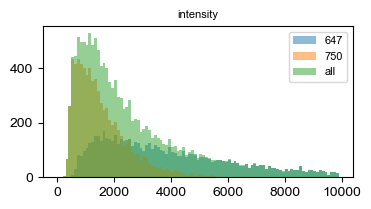

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.462s
-- region kept: 0.9976


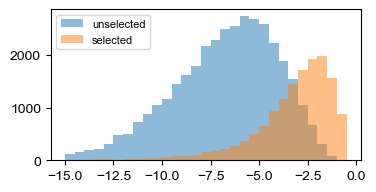

+ iter:9
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.442s
--- collapse all regions into 1d.


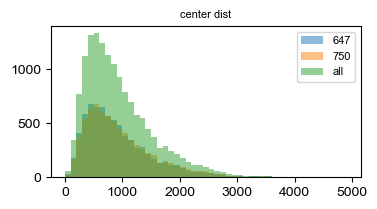

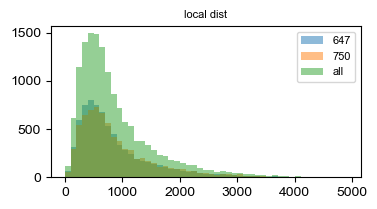

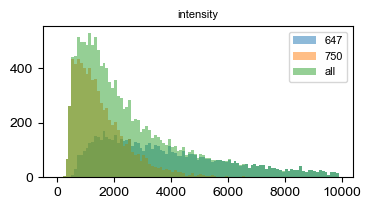

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.458s
-- region kept: 0.9979


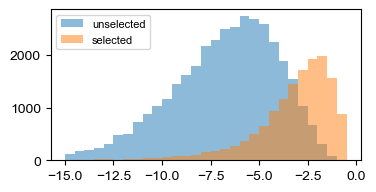

In [225]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 24
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list)
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), bins=np.arange(0,10000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

In [226]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -4.5
int_th = 200
bad_spot_percentage = 1

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

0.2774509803921568


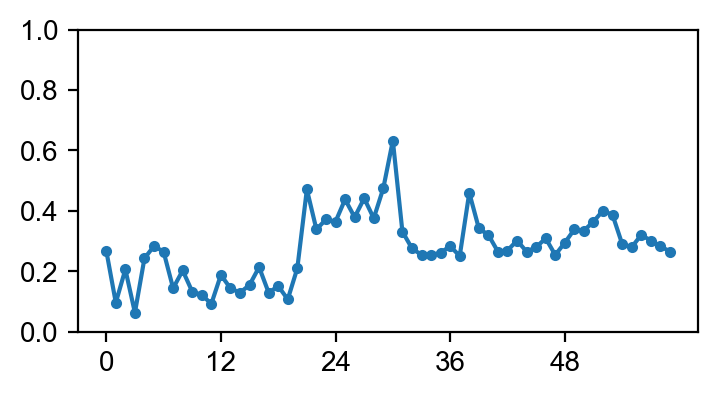

In [227]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_ylim([0,1])
ax.set_xticks(np.arange(0,len(dna_reg_ids),int(len(dna_reg_ids)/5)))
plt.show()

In [228]:
np.where(loss_rates > 0.3)[0]+1

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 39, 40, 41, 44, 47, 50,
       51, 52, 53, 54, 57, 58], dtype=int64)

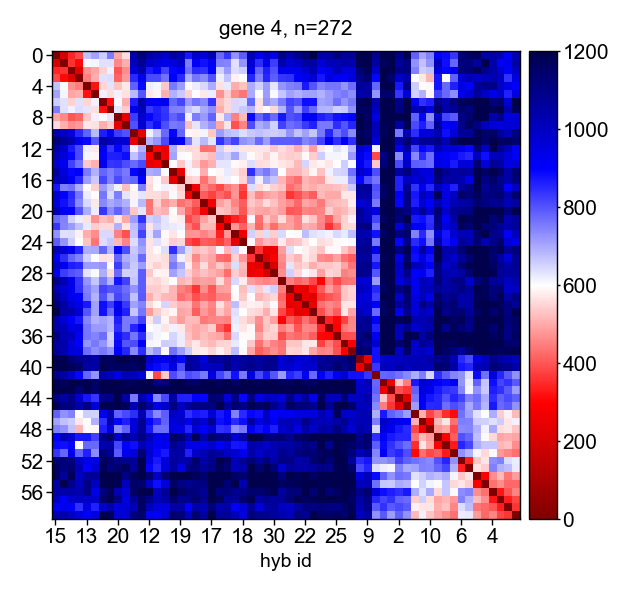

In [255]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'c':
            if int(_info[1:]) in dna_reg_ids:
                imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(np.array(dna_reg_channels) == '647')[0] # plot sepecific channel
#kept_inds = np.where(loss_rates<0.5)[0] # plot good regions only
kept_inds = np.arange(len(fov.combo_ids)) # plot all
kept_inds = leaves_list(clusters)

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,1200],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"gene {gid}, n={len(distmap_list)}", fontsize=7.5)

#_ticks = np.arange(0, len(kept_inds), 20)
_ticks = np.arange(0, len(kept_inds), 4)

ax.set_xticks(_ticks)
#ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
#x.set_xlabel(f"10kb region id", fontsize=7, labelpad=2)
ax.set_xticklabels(np.array((dna_reg_ids[kept_inds][_ticks]-1)/2+1, dtype=np.int32))
ax.set_xlabel(f"hyb id", fontsize=7, labelpad=2)

ax.set_yticks(_ticks)
#ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
#ax.set_ylabel(f"10kb region id", fontsize=7, labelpad=2)




#ax.axvline(x=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])
#ax.axhline(y=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

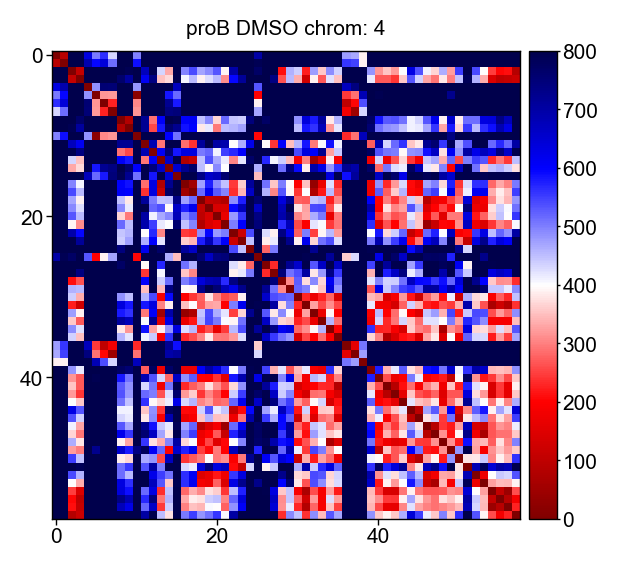

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x0000026428B66A48>


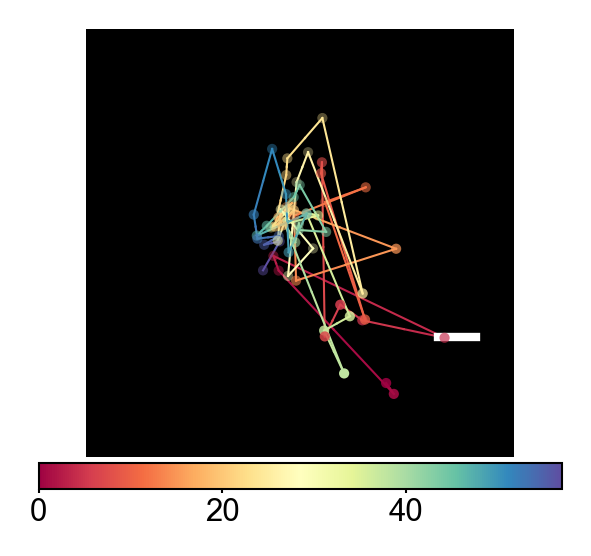

In [199]:
%matplotlib inline


reload(figure_tools.image)

chrom_id = 4

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
#valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,800],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=500, 
        line_width=0.5, figure_dpi=300, depthshade=True)
plt.show()

<IPython.core.display.Javascript object>


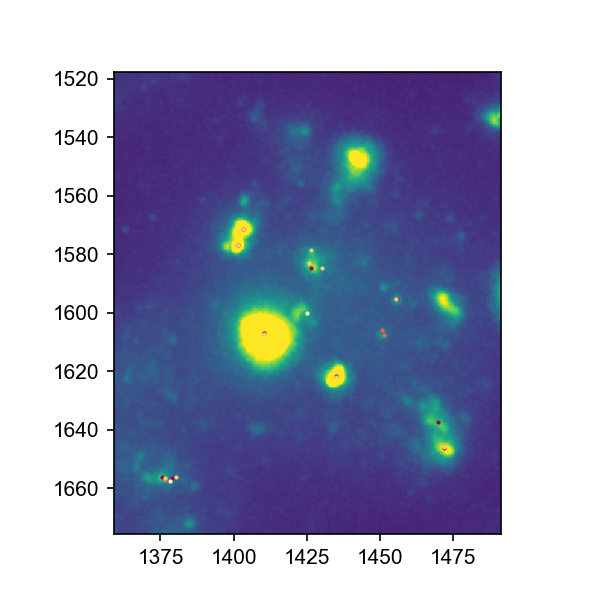

0
1
2
3


In [47]:
from matplotlib.cm import Spectral

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(gene_ims[gene_id].max(0), vmin=1000, vmax=3000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _i, _rid in enumerate(gene_unique_rids):
    print(_i)
    _uspots = kept_gene_spots_list[_i]
    #_uspots = gene_spots_list[_i]
    plt.plot(_uspots[:,3], _uspots[:,2], '.', markersize=2, 
             color=Spectral(_i/len(gene_unique_rids) * 0.7) )

plt.show()

In [23]:
im_bg

1075.0

<IPython.core.display.Javascript object>


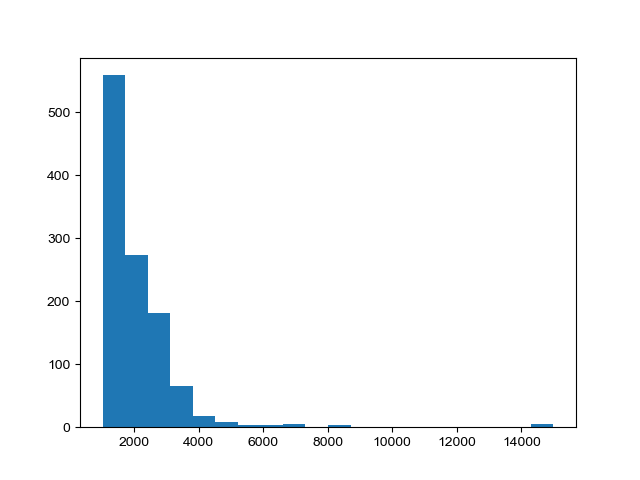

(array([559., 273., 182.,  66.,  17.,   9.,   3.,   4.,   5.,   0.,   3.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([ 1027.  ,  1725.15,  2423.3 ,  3121.45,  3819.6 ,  4517.75,
         5215.9 ,  5914.05,  6612.2 ,  7310.35,  8008.5 ,  8706.65,
         9404.8 , 10102.95, 10801.1 , 11499.25, 12197.4 , 12895.55,
        13593.7 , 14291.85, 14990.  ]),
 <a list of 20 Patch objects>)

In [21]:
plt.figure()
plt.hist(nb_max_ints, 20)

<IPython.core.display.Javascript object>


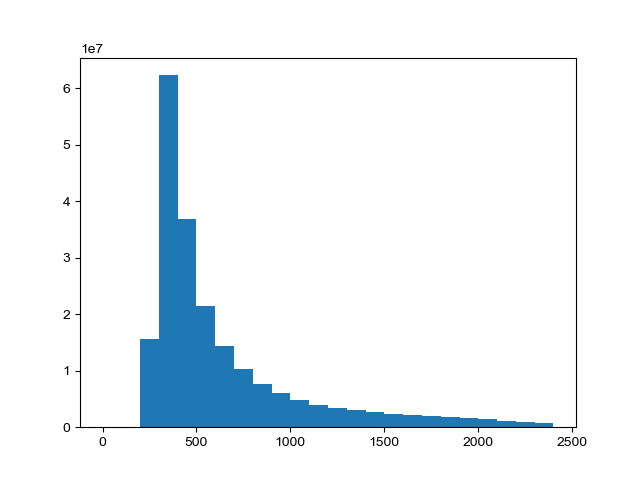

In [38]:
plt.figure()
plt.hist(np.ravel(fov.dapi_im), bins=np.arange(0,2500,100))
#plt.yscale('log')
plt.show()

In [23]:
intensity_th = 500

kept_raw_spots = []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    gene_unique_ims = _grp['ims'][gene_unique_rids]
    for _i, _rid in enumerate(gene_unique_rids):
        print(len(kept_gene_flags[_i]), len(_grp['raw_spots'][_rid]))
        kept_raw_spots.append(_grp['raw_spots'][_rid][np.where(kept_gene_flags[_i])[0]])

291 2000
271 2000
306 2000
280 2000


In [27]:
gene_unique_ims

array([[[[ 911, 1043,  994, ...,  790,  826,  730],
         [1025, 1061, 1020, ...,  836,  854,  746],
         [ 906, 1116, 1112, ...,  837,  771,  807],
         ...,
         [1036, 1008, 1033, ...,  741,  758,  803],
         [ 955,  959, 1024, ...,  836,  753,  819],
         [ 991,  952,  912, ...,  776,  813,  797]],

        [[ 869,  935,  967, ...,  680,  839,  809],
         [ 919, 1125, 1055, ...,  828,  848,  789],
         [ 990, 1065, 1028, ...,  923,  836,  862],
         ...,
         [ 902,  937, 1042, ...,  909,  761,  760],
         [ 869,  989, 1030, ...,  812,  778,  788],
         [ 906,  916, 1046, ...,  808,  710,  745]],

        [[ 836, 1069,  924, ...,  849,  809,  870],
         [1027, 1248, 1178, ...,  842,  931,  717],
         [1111, 1130, 1052, ...,  902,  883,  853],
         ...,
         [1060, 1062,  999, ...,  902,  778,  743],
         [ 991,  960, 1007, ...,  805,  896,  851],
         [ 946,  986,  986, ...,  852,  769,  692]],

        ...,

  

In [26]:
len(gene_unique_ims + [gene_ims[gene_id]])

4

<IPython.core.display.Javascript object>


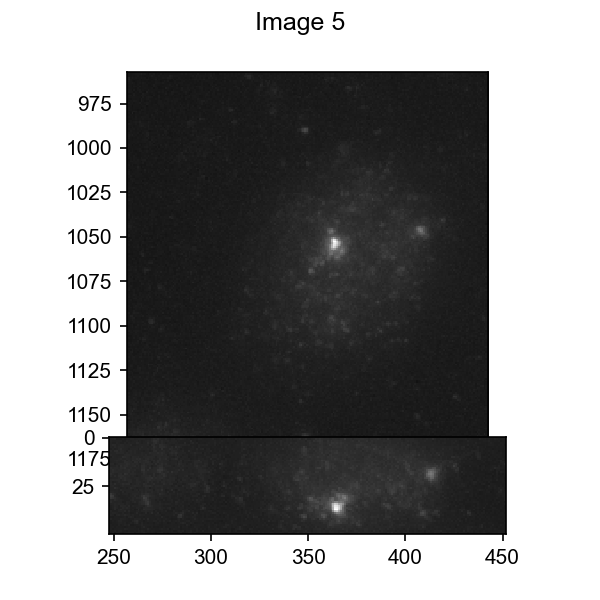

In [35]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(kept_raw_spots):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(list(gene_unique_ims) + [gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


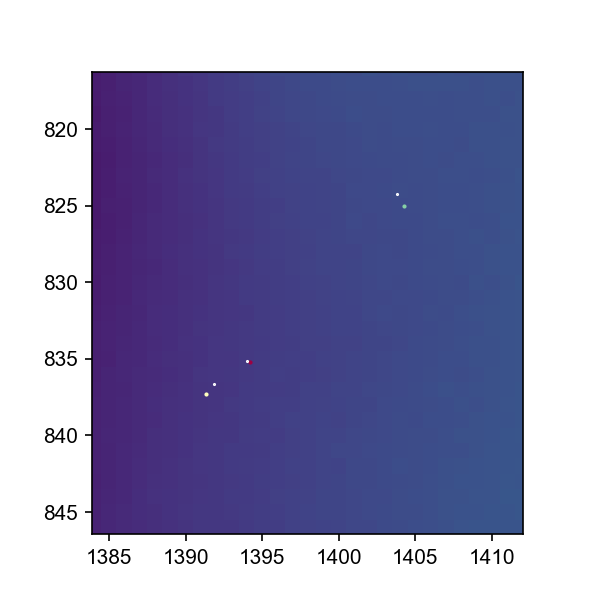

In [50]:
from matplotlib.cm import Spectral
int_th = 200

selected_rids = [0,1,2,3]

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _rid in selected_rids:
    _uspots = fov.unique_spots_list[_rid]
    
    unique_spots = fov.unique_spots_list[_rid]
    unique_spots = unique_spots[unique_spots[:,0] > int_th]
    combo_spots = fov.combo_spots_list[_rid]
    combo_spots = combo_spots[combo_spots[:,0] > int_th]

    unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
    combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

    kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
    kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]

    _filtered_uspots = unique_spots[kept_uinds]
    _filtered_cspots = combo_spots[kept_cinds]
    #_filtered_uspots = _uspots[_uspots[:,0] > int_th]
    plt.plot(_filtered_uspots[:,3], _filtered_uspots[:,2], '.', markersize=2, 
             color=Spectral(_rid/len(selected_rids)) )
    plt.plot(_filtered_cspots[:,3], _filtered_cspots[:,2], '.', markersize=1, 
             color=[1,1,1])
    #break
plt.show()

<IPython.core.display.Javascript object>


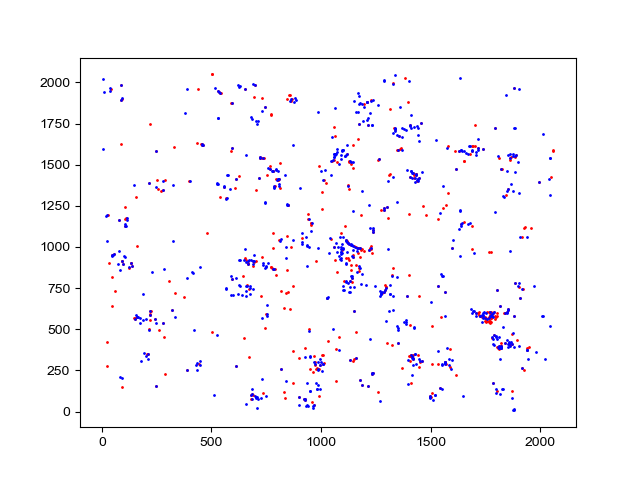

In [31]:
plt.figure()
plt.plot(unique_spots[:,2], unique_spots[:,3], 'r.', markersize=2)
plt.plot(combo_spots[:,2], combo_spots[:,3], 'b.', markersize=2)
plt.show()

In [ ]:
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind])

In [35]:
intensity_th = 500
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind][_grp['raw_spots'][_ind][:,0] > intensity_th])

<IPython.core.display.Javascript object>


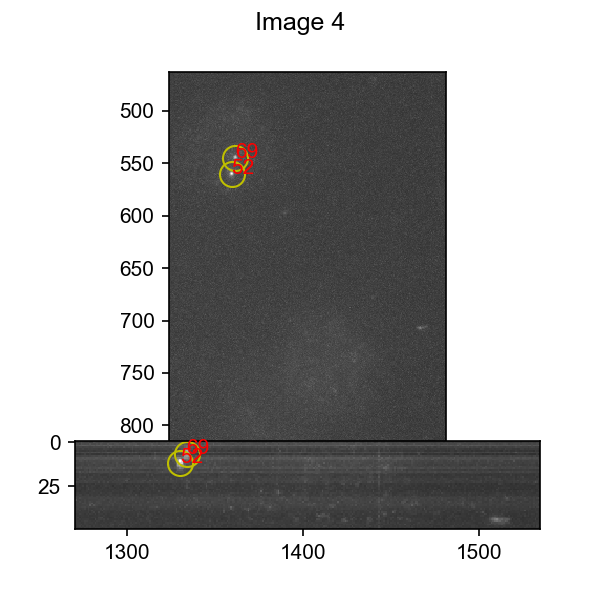

In [36]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_unique_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_unique_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [38]:
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_combo_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


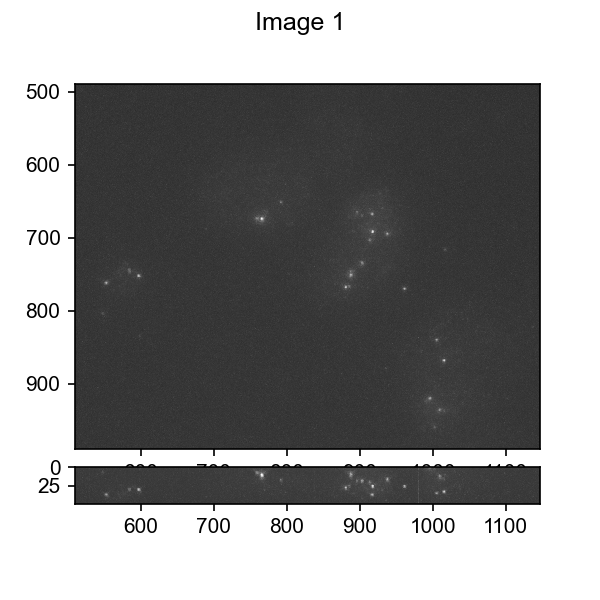

In [45]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_combo_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [157]:
vis_merfish_inds = np.arange(0,11)
vis_merfish_ims, vis_merfish_ids, vis_merfish_spot_list, vis_merfish_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['merfish']
    
    for _ind in vis_merfish_inds:
        vis_merfish_ims.append(_grp['ims'][_ind])
        vis_merfish_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_merfish_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


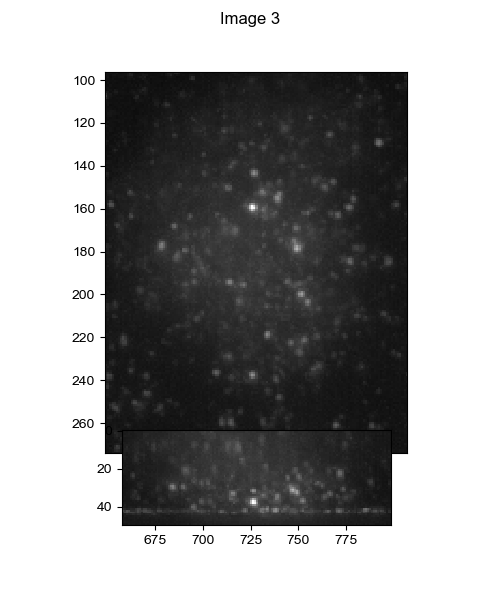

In [159]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_merfish_raw_spot_list):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(5,6), dpi=100)    
    
visual_tools.imshow_mark_3d_v2(vis_merfish_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [35]:
classes.batch_functions._color_dic_stat(fov.color_dic, fov.channels, fov.shared_parameters['allowed_data_types']).keys()

dict_keys(['combo', 'unique', 'gene'])

In [51]:
vis_gene_inds = [0,1,2,3,4]
vis_gene_ims, vis_gene_ids, vis_gene_spot_list, vis_gene_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    
    for _ind in vis_gene_inds:
        vis_gene_ims.append(_grp['ims'][_ind])
        vis_gene_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


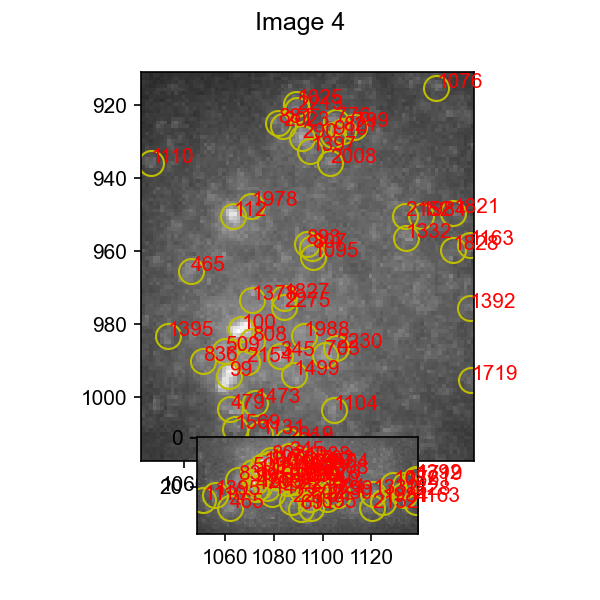

In [52]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_gene_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_gene_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

## Segmentation by Cellpose

In [6]:
import cv2
from cellpose import utils
from cellpose import models

In [7]:
dapi_im = fov._load_dapi_image()

directly return existing attribute.


In [8]:
visual_tools.imshow_mark_3d_v2([dapi_im], )

<IPython.core.display.Javascript object>

In [21]:
# 3d segmentation
import cellpose
from cellpose import models
model_3d = models.Cellpose(gpu=True, model_type='cyto')
masks_3d, flows_3d, styles_3d, diams_3d = model_3d.eval(fov.dapi_im[:], 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=100,
                                                        do_3D=True)

2021-07-13 12:03:45,601 [INFO] ** TORCH CUDA version installed and working. **
2021-07-13 12:03:45,602 [INFO] >>>> using GPU
2021-07-13 12:03:45,721 [INFO] ~~~ FINDING MASKS ~~~
2021-07-13 12:03:45,722 [INFO] multi-stack tiff read in as having 60 planes 1 channels
2021-07-13 12:04:03,845 [INFO] running YX: 60 planes of size (2048, 2048)
2021-07-13 12:04:04,563 [INFO] 0%|          | 0/60 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 12.00 GiB total capacity; 8.78 GiB already allocated; 11.63 MiB free; 8.86 GiB reserved in total by PyTorch)

In [27]:
import torch

In [28]:
torch.cuda.empty_cache()

In [29]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 4            |        cudaMalloc retries: 4         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    8990 MB |    8991 MB |   31925 GB |   31917 GB |
|       from large pool |    8968 MB |    8968 MB |   31887 GB |   31878 GB |
|       from small pool |      21 MB |      33 MB |      38 GB |      38 GB |
|---------------------------------------------------------------------------|
| Active memory         |    8990 MB |    8991 MB |   31925 GB |   31917 GB |
|       from large pool |    8968 MB |    8968 MB |   31887 GB |

<IPython.core.display.Javascript object>


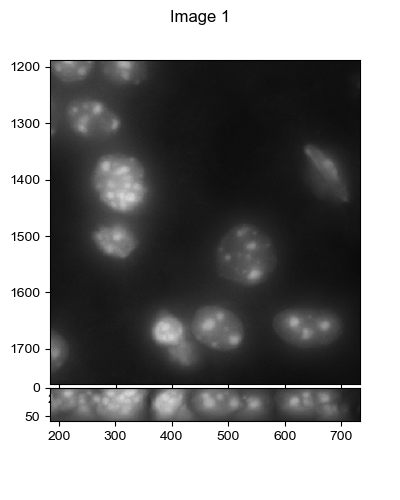

In [15]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, masks_3d])

<IPython.core.display.Javascript object>


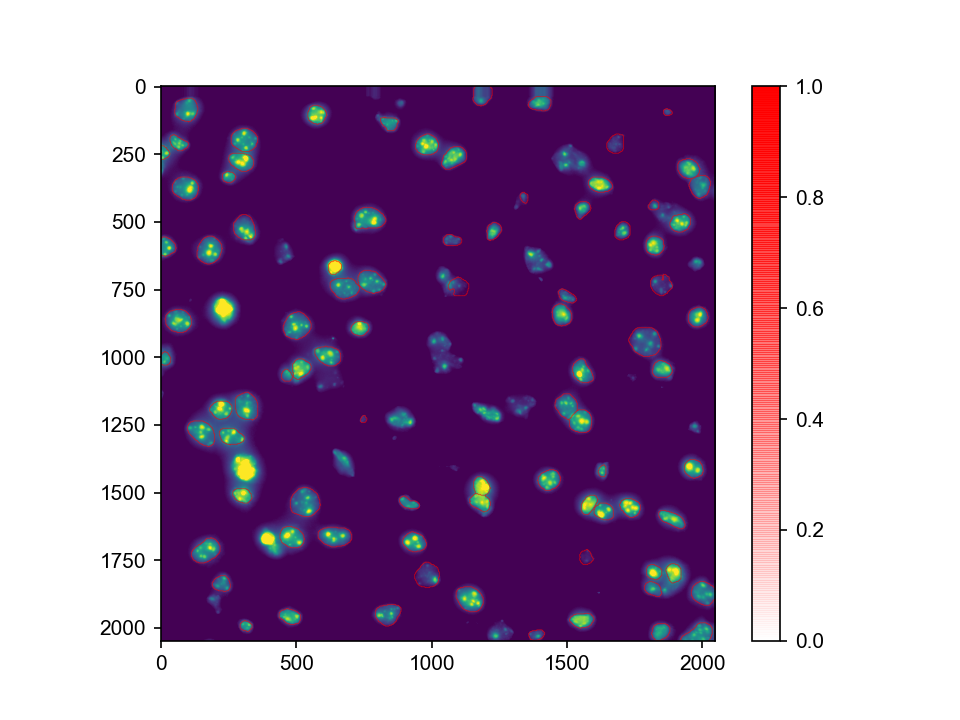

In [28]:
from skimage.segmentation import find_boundaries

plt.figure(dpi=150)
plt.imshow(fov.dapi_im.max(0), vmin=1000, vmax=4000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))
plt.colorbar()
plt.show()

In [54]:
flows_2d

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[-1.2696758e-03, -2.1507517e-03,  4.8279762e-06, ...,
          -9.3707815e-04,  8.8630628e-04,  3.4075491e-03],
         [-8.8315830e-04, -2

<IPython.core.display.Javascript object>


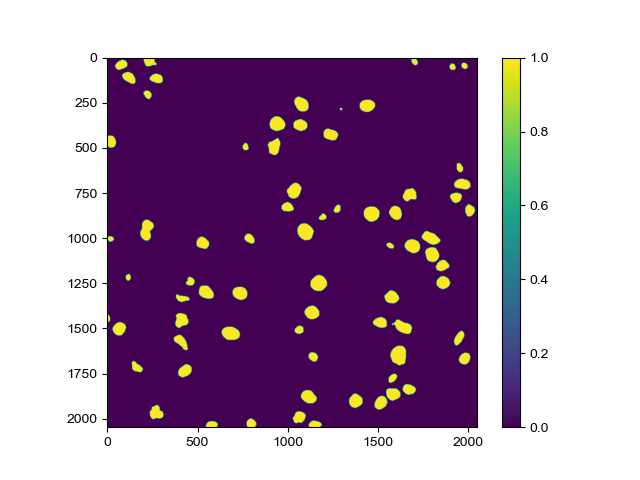

In [70]:
plt.figure()
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [10]:
# test 3D segmentation
from cellpose import models
model_3d = models.Cellpose(gpu=False, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model.eval(fov.dapi_im[10:30], diameter=50, channels=[0,0], do_3D=True)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
multi-stack tiff read in as having 20 planes 1 channels

 running YX: 20 planes of size (2048, 2048) 




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.23s/it]



 running ZY: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:21<00:00,  1.49s/it]



 running ZX: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:08<00:00,  1.44s/it]


flows computed 3399.48s
dynamics computed 3416.00s
masks computed 3457.83s
estimated masks for 1 image(s) in 3554.92 sec
>>>> TOTAL TIME 3554.92 sec


In [11]:
masks.shape

(20, 2048, 2048)

In [9]:
import torch
torch.cuda.empty_cache()

In [36]:
del(model)

<IPython.core.display.Javascript object>


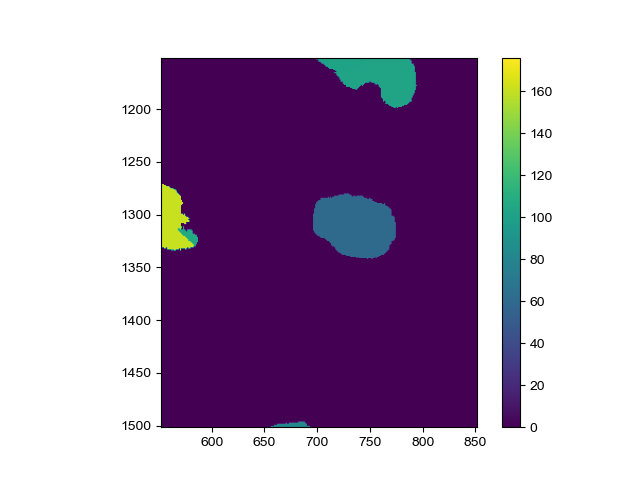

In [13]:
plt.figure()
plt.imshow(masks[10])
plt.colorbar()
plt.show()

In [ ]:
cellposeOutline

In [53]:
import imagedisplay as imdis 

ModuleNotFoundError: No module named 'imagedisplay'

In [ ]:
cellposeOutline = imdis.getMaskBoundaries(masks_cyto)
